# WeatherPy
----

#### Observable Trends

* As expected, cities closer to the equator have higher temperatures and higher humidity.

* Cloudiness and windspeed were more even spread across both hemisphere, with the northern hemisphere experienceing slightly higher winds speeds than the southern.

* Cities in the extreme northern and southern hemispheres are much colder than their more moderately-located couterparts.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


dataRecord = 1

print(f"wait")
print(f"***")

for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        maxTemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windSpeed.append(response["wind"]["speed"])
        cityRecord = response["name"]
        print(f"gathering data {dataRecord} | {cityRecord}")
        print(f"{url}&q={city}")
        
        dataRecord= dataRecord + 1
        
        time.sleep(1.01)
    
    except:
        print("no relevant data...")
    continue        

wait
***
gathering data 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura
gathering data 2 | Biltine
http://api.openweathermap.org/data/2.5/weather?&q=biltine
gathering data 3 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?&q=mar del plata
gathering data 4 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta arenas
gathering data 5 | Fortuna
http://api.openweathermap.org/data/2.5/weather?&q=fortuna
gathering data 6 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?&q=carnarvon
gathering data 7 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp
gathering data 8 | Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson
gathering data 9 | Stargard
http://api.openweathermap.org/data/2.5/weather?&q=stargard szczecinski
no relevant data...
gathering data 10 | Farakka
http://api.openweathermap.org/data/2.5/weather?&q=farakka
gathering data 11 | Wanning
http://api.openweathermap.org/data/2.5/weather?&

gathering data 91 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?&q=ostrovnoy
gathering data 92 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?&q=nikolskoye
no relevant data...
gathering data 93 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?&q=hithadhoo
gathering data 94 | Hofn
http://api.openweathermap.org/data/2.5/weather?&q=hofn
gathering data 95 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?&q=kruisfontein
gathering data 96 | Rawson
http://api.openweathermap.org/data/2.5/weather?&q=rawson
gathering data 97 | Buin
http://api.openweathermap.org/data/2.5/weather?&q=buin
gathering data 98 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?&q=victoria
no relevant data...
gathering data 99 | Horta
http://api.openweathermap.org/data/2.5/weather?&q=horta
gathering data 100 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth
gathering data 101 | Quang Ngai
http://api.openweathermap.org/data/2.5/weath

gathering data 179 | Camacha
http://api.openweathermap.org/data/2.5/weather?&q=camacha
gathering data 180 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?&q=batemans bay
gathering data 181 | Kathmandu
http://api.openweathermap.org/data/2.5/weather?&q=kathmandu
gathering data 182 | Poronaysk
http://api.openweathermap.org/data/2.5/weather?&q=poronaysk
gathering data 183 | São Filipe
http://api.openweathermap.org/data/2.5/weather?&q=sao filipe
no relevant data...
gathering data 184 | Karakol
http://api.openweathermap.org/data/2.5/weather?&q=karakol
gathering data 185 | Salalah
http://api.openweathermap.org/data/2.5/weather?&q=salalah
no relevant data...
gathering data 186 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?&q=kavaratti
gathering data 187 | Wahiawā
http://api.openweathermap.org/data/2.5/weather?&q=wahiawa
gathering data 188 | Mahibadhoo
http://api.openweathermap.org/data/2.5/weather?&q=mahibadhoo
gathering data 189 | Chincholi
http://api.openweathermap

gathering data 269 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?&q=haines junction
gathering data 270 | Salym
http://api.openweathermap.org/data/2.5/weather?&q=salym
gathering data 271 | San Jose
http://api.openweathermap.org/data/2.5/weather?&q=san jose
gathering data 272 | Praia da Vitória
http://api.openweathermap.org/data/2.5/weather?&q=praia da vitoria
gathering data 273 | Juneau
http://api.openweathermap.org/data/2.5/weather?&q=juneau
gathering data 274 | Boguchany
http://api.openweathermap.org/data/2.5/weather?&q=boguchany
gathering data 275 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?&q=grand gaube
gathering data 276 | Aklavik
http://api.openweathermap.org/data/2.5/weather?&q=aklavik
gathering data 277 | Ürümqi
http://api.openweathermap.org/data/2.5/weather?&q=urumqi
gathering data 278 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?&q=gat
gathering data 279 | Umluj
http://api.openweathermap.org/data/2.5/weather?&q=umm lajj
gathe

gathering data 359 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?&q=ponta delgada
no relevant data...
gathering data 360 | Nizhniy Tsasuchey
http://api.openweathermap.org/data/2.5/weather?&q=nizhniy tsasuchey
gathering data 361 | Boundiali
http://api.openweathermap.org/data/2.5/weather?&q=boundiali
gathering data 362 | Champerico
http://api.openweathermap.org/data/2.5/weather?&q=champerico
no relevant data...
gathering data 363 | Maun
http://api.openweathermap.org/data/2.5/weather?&q=maun
no relevant data...
gathering data 364 | Narsaq
http://api.openweathermap.org/data/2.5/weather?&q=narsaq
gathering data 365 | Siavonga
http://api.openweathermap.org/data/2.5/weather?&q=siavonga
gathering data 366 | Tārāpur
http://api.openweathermap.org/data/2.5/weather?&q=tarapur
gathering data 367 | San Francisco
http://api.openweathermap.org/data/2.5/weather?&q=san francisco
gathering data 368 | Ségou
http://api.openweathermap.org/data/2.5/weather?&q=segou
gathering data 369 | Labuh

gathering data 448 | Siocon
http://api.openweathermap.org/data/2.5/weather?&q=siocon
gathering data 449 | Tura
http://api.openweathermap.org/data/2.5/weather?&q=tura
gathering data 450 | Hatillo
http://api.openweathermap.org/data/2.5/weather?&q=hatillo
gathering data 451 | Stephenville
http://api.openweathermap.org/data/2.5/weather?&q=stephenville
gathering data 452 | Seoul
http://api.openweathermap.org/data/2.5/weather?&q=seoul
gathering data 453 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?&q=solnechnyy
gathering data 454 | Bensonville
http://api.openweathermap.org/data/2.5/weather?&q=bensonville
gathering data 455 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?&q=beringovskiy
no relevant data...
gathering data 456 | Stokmarknes
http://api.openweathermap.org/data/2.5/weather?&q=stokmarknes
gathering data 457 | Takaka
http://api.openweathermap.org/data/2.5/weather?&q=takaka
gathering data 458 | Balkanabat
http://api.openweathermap.org/data/2.5/weather?&q=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": cityName,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":lat, 
    "Longitude":lng, 
    "Max Temperature": maxTemp,
    "Wind Speed":windSpeed
}

weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City               538
Cloudiness         538
Country            538
Date               538
Humidity           538
Latitude           538
Longitude          538
Max Temperature    538
Wind Speed         538
dtype: int64

In [13]:
weather_data.to_csv('output_data/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Mataura,0,NZ,1592518526,83,-46.19,168.86,39.00,3.00
1,Biltine,12,TD,1592518527,53,14.53,20.92,79.66,17.36
2,Mar del Plata,40,AR,1592518528,87,-38.00,-57.56,54.00,8.05
3,Punta Arenas,90,CL,1592518529,86,-53.15,-70.92,39.20,14.99
4,Fortuna,20,US,1592518366,68,40.60,-124.16,68.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

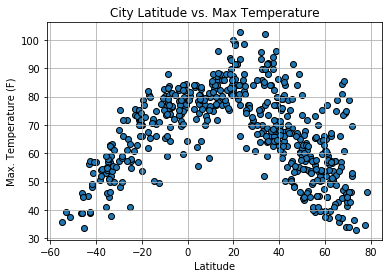

In [14]:
# Create DataFrames, went this direction after creating DataFrames for the hemispheres
#...seemed like a cleaner direction
hemiIndex = weather_data.set_index('City')

hemiLat = hemiIndex['Latitude']
hemiMaxT = hemiIndex['Max Temperature']
hemiHum = hemiIndex['Humidity']
hemiCl = hemiIndex['Cloudiness']
hemiWS = hemiIndex['Wind Speed']

# Scatter Plot
plt.scatter(hemiLat, hemiMaxT, marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/temp_vs_temp_plot.png")

plt.show()

#### Latitude vs. Humidity Plot

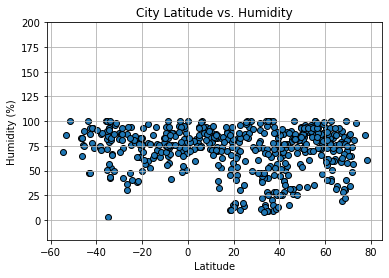

In [15]:
plt.scatter(hemiLat, hemiHum, marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-20,200)

plt.savefig("output_data/temp_vs_humidity_plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

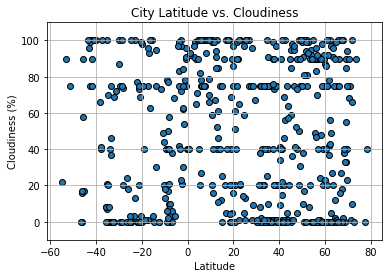

In [16]:
plt.scatter(hemiLat, hemiCl, marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-10, 110)

plt.savefig("output_data/temp_vs_cloud_plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

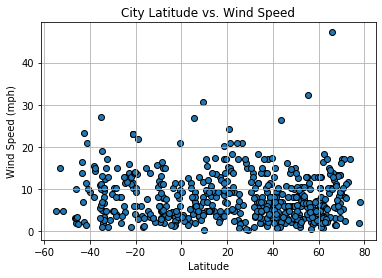

In [17]:
plt.scatter(hemiLat, hemiWS, marker="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/temp_vs_windspeed_plot.png")

plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere
nHemi = hemiIndex.loc[(hemiIndex["Latitude"] > 0), :]
nHemiLat = nHemi['Latitude']
nHemiMaxT = nHemi['Max Temperature']
nHemiHum = nHemi['Humidity']
nHemiCl = nHemi['Cloudiness']
nHemiWS = nHemi ['Wind Speed']

# Southern Hemisphere
sHemi = hemiIndex.loc[(hemiIndex["Latitude"] <= 0), :]
sHemiLat = sHemi['Latitude']
sHemiMaxT = sHemi['Max Temperature']
sHemiHum = sHemi['Humidity']
sHemiCl = sHemi['Cloudiness']
sHemiWS = sHemi ['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6896600993558206


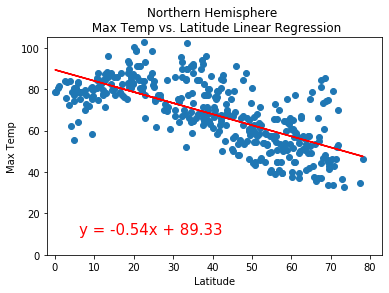

In [20]:
n_mVl_slope, n_mVl_int, n_mVl_r, n_mVl_p, n_mVl_std_err = linregress(nHemiLat, nHemiMaxT)
n_mVl_fit = n_mVl_slope *nHemiLat + n_mVl_int
line_eq = "y = " + str(round(n_mVl_slope,2)) + "x + " + str(round(n_mVl_int,2))
plt.scatter(nHemiLat, nHemiMaxT)
plt.plot(nHemiLat,n_mVl_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(0, 105)
plt.xlim(-2, 83)
plt.title("Northern Hemisphere \n Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {n_mVl_r}")

plt.savefig("output_data/Max Temp vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8301923938493109


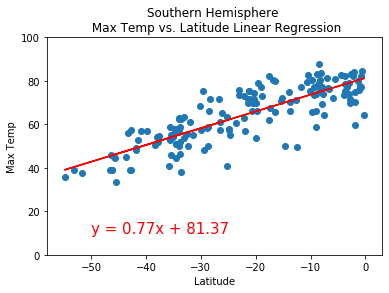

In [21]:
s_mVl_slope, s_mVl_int, s_mVl_r, s_mVl_p, s_mVl_std_err = linregress(sHemiLat, sHemiMaxT)
s_mVl_fit = s_mVl_slope *sHemiLat + s_mVl_int
line_eq = "y = " + str(round(s_mVl_slope,2)) + "x + " + str(round(s_mVl_int,2))
plt.scatter(sHemiLat, sHemiMaxT)
plt.plot(sHemiLat,s_mVl_fit,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylim(0, 100)
plt.xlim(-58, 3)
plt.title("Southern Hemisphere \n Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {s_mVl_r}")

plt.savefig("output_data/SH - Max Temp vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.008922293562719575


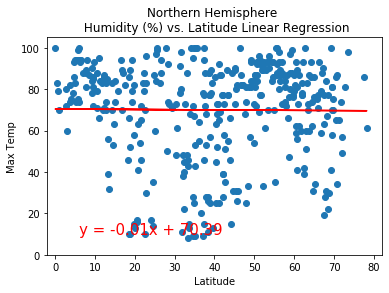

In [22]:
n_hVl_slope, n_hVl_int, n_hVl_r, n_hVl_p, n_hVl_std_err = linregress(nHemiLat, nHemiHum)
n_hVl_fit = n_hVl_slope *nHemiLat + n_hVl_int
line_eq = "y = " + str(round(n_hVl_slope,2)) + "x + " + str(round(n_hVl_int,2))
plt.scatter(nHemiLat, nHemiHum)
plt.plot(nHemiLat,n_hVl_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(0, 105)
plt.xlim(-2, 82)
plt.title("Northern Hemisphere \n Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {n_hVl_r}")

plt.savefig("output_data/NH - Humidity vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.014262195474718267


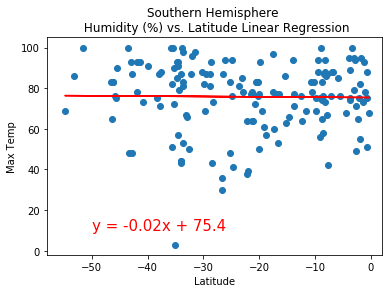

In [23]:
s_hVl_slope, s_hVl_int, s_hVl_r, s_hVl_p, s_hVl_std_err = linregress(sHemiLat, sHemiHum)
s_hVl_fit = s_hVl_slope *sHemiLat + s_hVl_int
line_eq = "y = " + str(round(s_hVl_slope,2)) + "x + " + str(round(s_hVl_int,2))
plt.scatter(sHemiLat, sHemiHum)
plt.plot(sHemiLat,s_hVl_fit,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylim(-2, 105)
plt.xlim(-58, 2)
plt.title("Southern Hemisphere \n Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {s_hVl_r}")

plt.savefig("output_data/SH - Humidity vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.14360164899159986


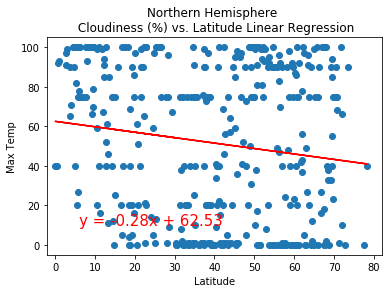

In [24]:
n_cVl_slope, n_cVl_int, n_cVl_r, n_cVl_p, n_cVl_std_err = linregress(nHemiLat, nHemiCl)
n_cVl_fit = n_cVl_slope *nHemiLat + n_cVl_int
line_eq = "y = " + str(round(n_cVl_slope,2)) + "x + " + str(round(n_cVl_int,2))
plt.scatter(nHemiLat, nHemiCl)
plt.plot(nHemiLat,n_cVl_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(-5, 105)
plt.xlim(-2, 82)
plt.title("Northern Hemisphere \n Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {n_cVl_r}")

plt.savefig("output_data/NH - Cloudiness vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03956411645975983


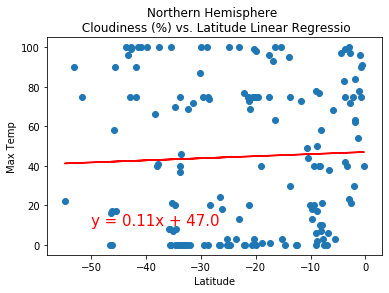

In [25]:
s_cVl_slope, s_cVl_int, s_cVl_r, s_cVl_p, s_cVl_std_err = linregress(sHemiLat, sHemiCl)
s_cVl_fit = s_cVl_slope *sHemiLat + s_cVl_int
line_eq = "y = " + str(round(s_cVl_slope,2)) + "x + " + str(round(s_cVl_int,2))
plt.scatter(sHemiLat, sHemiCl)
plt.plot(sHemiLat,s_cVl_fit,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylim(-5, 105)
plt.xlim(-58, 3)
plt.title("Northern Hemisphere \n Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {s_cVl_r}")

plt.savefig("output_data/SH - Cloudiness vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.026323114604632547


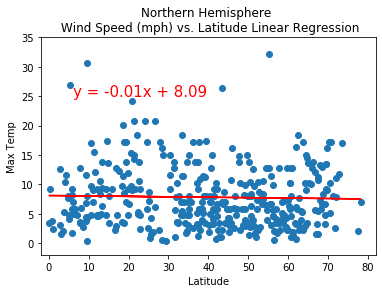

In [26]:
n_hVl_slope, n_hVl_int, n_hVl_r, n_hVl_p, n_hVl_std_err = linregress(nHemiLat, nHemiWS)
n_hVl_fit = n_hVl_slope *nHemiLat + n_hVl_int
line_eq = "y = " + str(round(n_hVl_slope,2)) + "x + " + str(round(n_hVl_int,2))
plt.scatter(nHemiLat, nHemiWS)
plt.plot(nHemiLat,n_hVl_fit,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.ylim(-2, 35)
plt.xlim(-2, 82)
plt.title("Northern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {n_hVl_r}")

plt.savefig("output_data/NH - Wind Speed vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14011289142007965


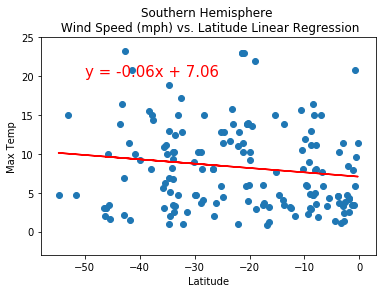

In [27]:
s_hVl_slope, s_hVl_int, s_hVl_r, s_hVl_p, s_hVl_std_err = linregress(sHemiLat, sHemiWS)
s_hVl_fit = s_hVl_slope *sHemiLat + s_hVl_int
line_eq = "y = " + str(round(s_hVl_slope,2)) + "x + " + str(round(s_hVl_int,2))
plt.scatter(sHemiLat, sHemiWS)
plt.plot(sHemiLat,s_hVl_fit,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylim(-3, 25)
plt.xlim(-58, 3)
plt.title("Southern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {s_hVl_r}")

plt.savefig("output_data/SH - Wind Speed vs. Latitude Linear Regression.png")

plt.show()